# Compound Interest Calculator

## Theoretical Foundation

Compound interest is the addition of interest to the principal sum of a loan or deposit, where the interest that accrues also earns interest from that point forward. This mechanism is fundamental to financial mathematics and exponential growth phenomena.

### Basic Compound Interest Formula

The future value $A$ of an investment with compound interest is given by:

$$A = P\left(1 + \frac{r}{n}\right)^{nt}$$

where:
- $P$ = Principal (initial investment)
- $r$ = Annual interest rate (as a decimal)
- $n$ = Number of times interest is compounded per year
- $t$ = Time in years
- $A$ = Amount after time $t$

### Continuous Compounding

As the compounding frequency $n \to \infty$, we obtain continuous compounding:

$$A = Pe^{rt}$$

This follows from the limit definition of $e$:

$$e = \lim_{n \to \infty}\left(1 + \frac{1}{n}\right)^n$$

### Effective Annual Rate (EAR)

The effective annual rate accounts for compounding and is computed as:

$$\text{EAR} = \left(1 + \frac{r}{n}\right)^n - 1$$

For continuous compounding:

$$\text{EAR} = e^r - 1$$

### Present Value

The present value $P$ of a future amount $A$ is the inverse operation:

$$P = \frac{A}{\left(1 + \frac{r}{n}\right)^{nt}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for publication-quality figures
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

## Implementation of Compound Interest Functions

In [2]:
def compound_interest(principal, rate, n_compounding, time):
    """
    Calculate future value with discrete compound interest.
    
    Parameters
    ----------
    principal : float
        Initial investment amount
    rate : float
        Annual interest rate (decimal form)
    n_compounding : int
        Number of compounding periods per year
    time : float or array-like
        Time in years
    
    Returns
    -------
    float or ndarray
        Future value of the investment
    """
    return principal * (1 + rate / n_compounding) ** (n_compounding * time)


def continuous_compound_interest(principal, rate, time):
    """
    Calculate future value with continuous compound interest.
    
    Parameters
    ----------
    principal : float
        Initial investment amount
    rate : float
        Annual interest rate (decimal form)
    time : float or array-like
        Time in years
    
    Returns
    -------
    float or ndarray
        Future value of the investment
    """
    return principal * np.exp(rate * time)


def effective_annual_rate(nominal_rate, n_compounding):
    """
    Calculate the effective annual rate (EAR).
    
    Parameters
    ----------
    nominal_rate : float
        Nominal annual interest rate (decimal form)
    n_compounding : int
        Number of compounding periods per year
    
    Returns
    -------
    float
        Effective annual rate
    """
    return (1 + nominal_rate / n_compounding) ** n_compounding - 1


def present_value(future_value, rate, n_compounding, time):
    """
    Calculate present value of a future amount.
    
    Parameters
    ----------
    future_value : float
        Future amount
    rate : float
        Annual interest rate (decimal form)
    n_compounding : int
        Number of compounding periods per year
    time : float
        Time in years
    
    Returns
    -------
    float
        Present value
    """
    return future_value / (1 + rate / n_compounding) ** (n_compounding * time)

## Numerical Analysis

### Example Calculation

Consider an initial investment of $P = \$10,000$ at an annual rate of $r = 5\%$ over $t = 10$ years.

In [3]:
# Define parameters
P = 10000  # Principal ($)
r = 0.05   # Annual rate (5%)
t = 10     # Time (years)

# Calculate future values for different compounding frequencies
compounding_frequencies = {
    'Annual (n=1)': 1,
    'Semi-annual (n=2)': 2,
    'Quarterly (n=4)': 4,
    'Monthly (n=12)': 12,
    'Daily (n=365)': 365
}

print("Compound Interest Comparison")
print("=" * 50)
print(f"Principal: ${P:,.2f}")
print(f"Annual Rate: {r*100:.1f}%")
print(f"Time Period: {t} years")
print("=" * 50)
print()

for name, n in compounding_frequencies.items():
    fv = compound_interest(P, r, n, t)
    ear = effective_annual_rate(r, n)
    print(f"{name}:")
    print(f"  Future Value: ${fv:,.2f}")
    print(f"  Effective Annual Rate: {ear*100:.4f}%")
    print()

# Continuous compounding
fv_continuous = continuous_compound_interest(P, r, t)
ear_continuous = np.exp(r) - 1
print(f"Continuous Compounding:")
print(f"  Future Value: ${fv_continuous:,.2f}")
print(f"  Effective Annual Rate: {ear_continuous*100:.4f}%")

Compound Interest Comparison
Principal: $10,000.00
Annual Rate: 5.0%
Time Period: 10 years

Annual (n=1):
  Future Value: $16,288.95
  Effective Annual Rate: 5.0000%

Semi-annual (n=2):
  Future Value: $16,386.16
  Effective Annual Rate: 5.0625%

Quarterly (n=4):
  Future Value: $16,436.19
  Effective Annual Rate: 5.0945%

Monthly (n=12):
  Future Value: $16,470.09
  Effective Annual Rate: 5.1162%

Daily (n=365):
  Future Value: $16,486.65
  Effective Annual Rate: 5.1267%

Continuous Compounding:
  Future Value: $16,487.21
  Effective Annual Rate: 5.1271%


## Visualization

### Growth Comparison Across Compounding Frequencies

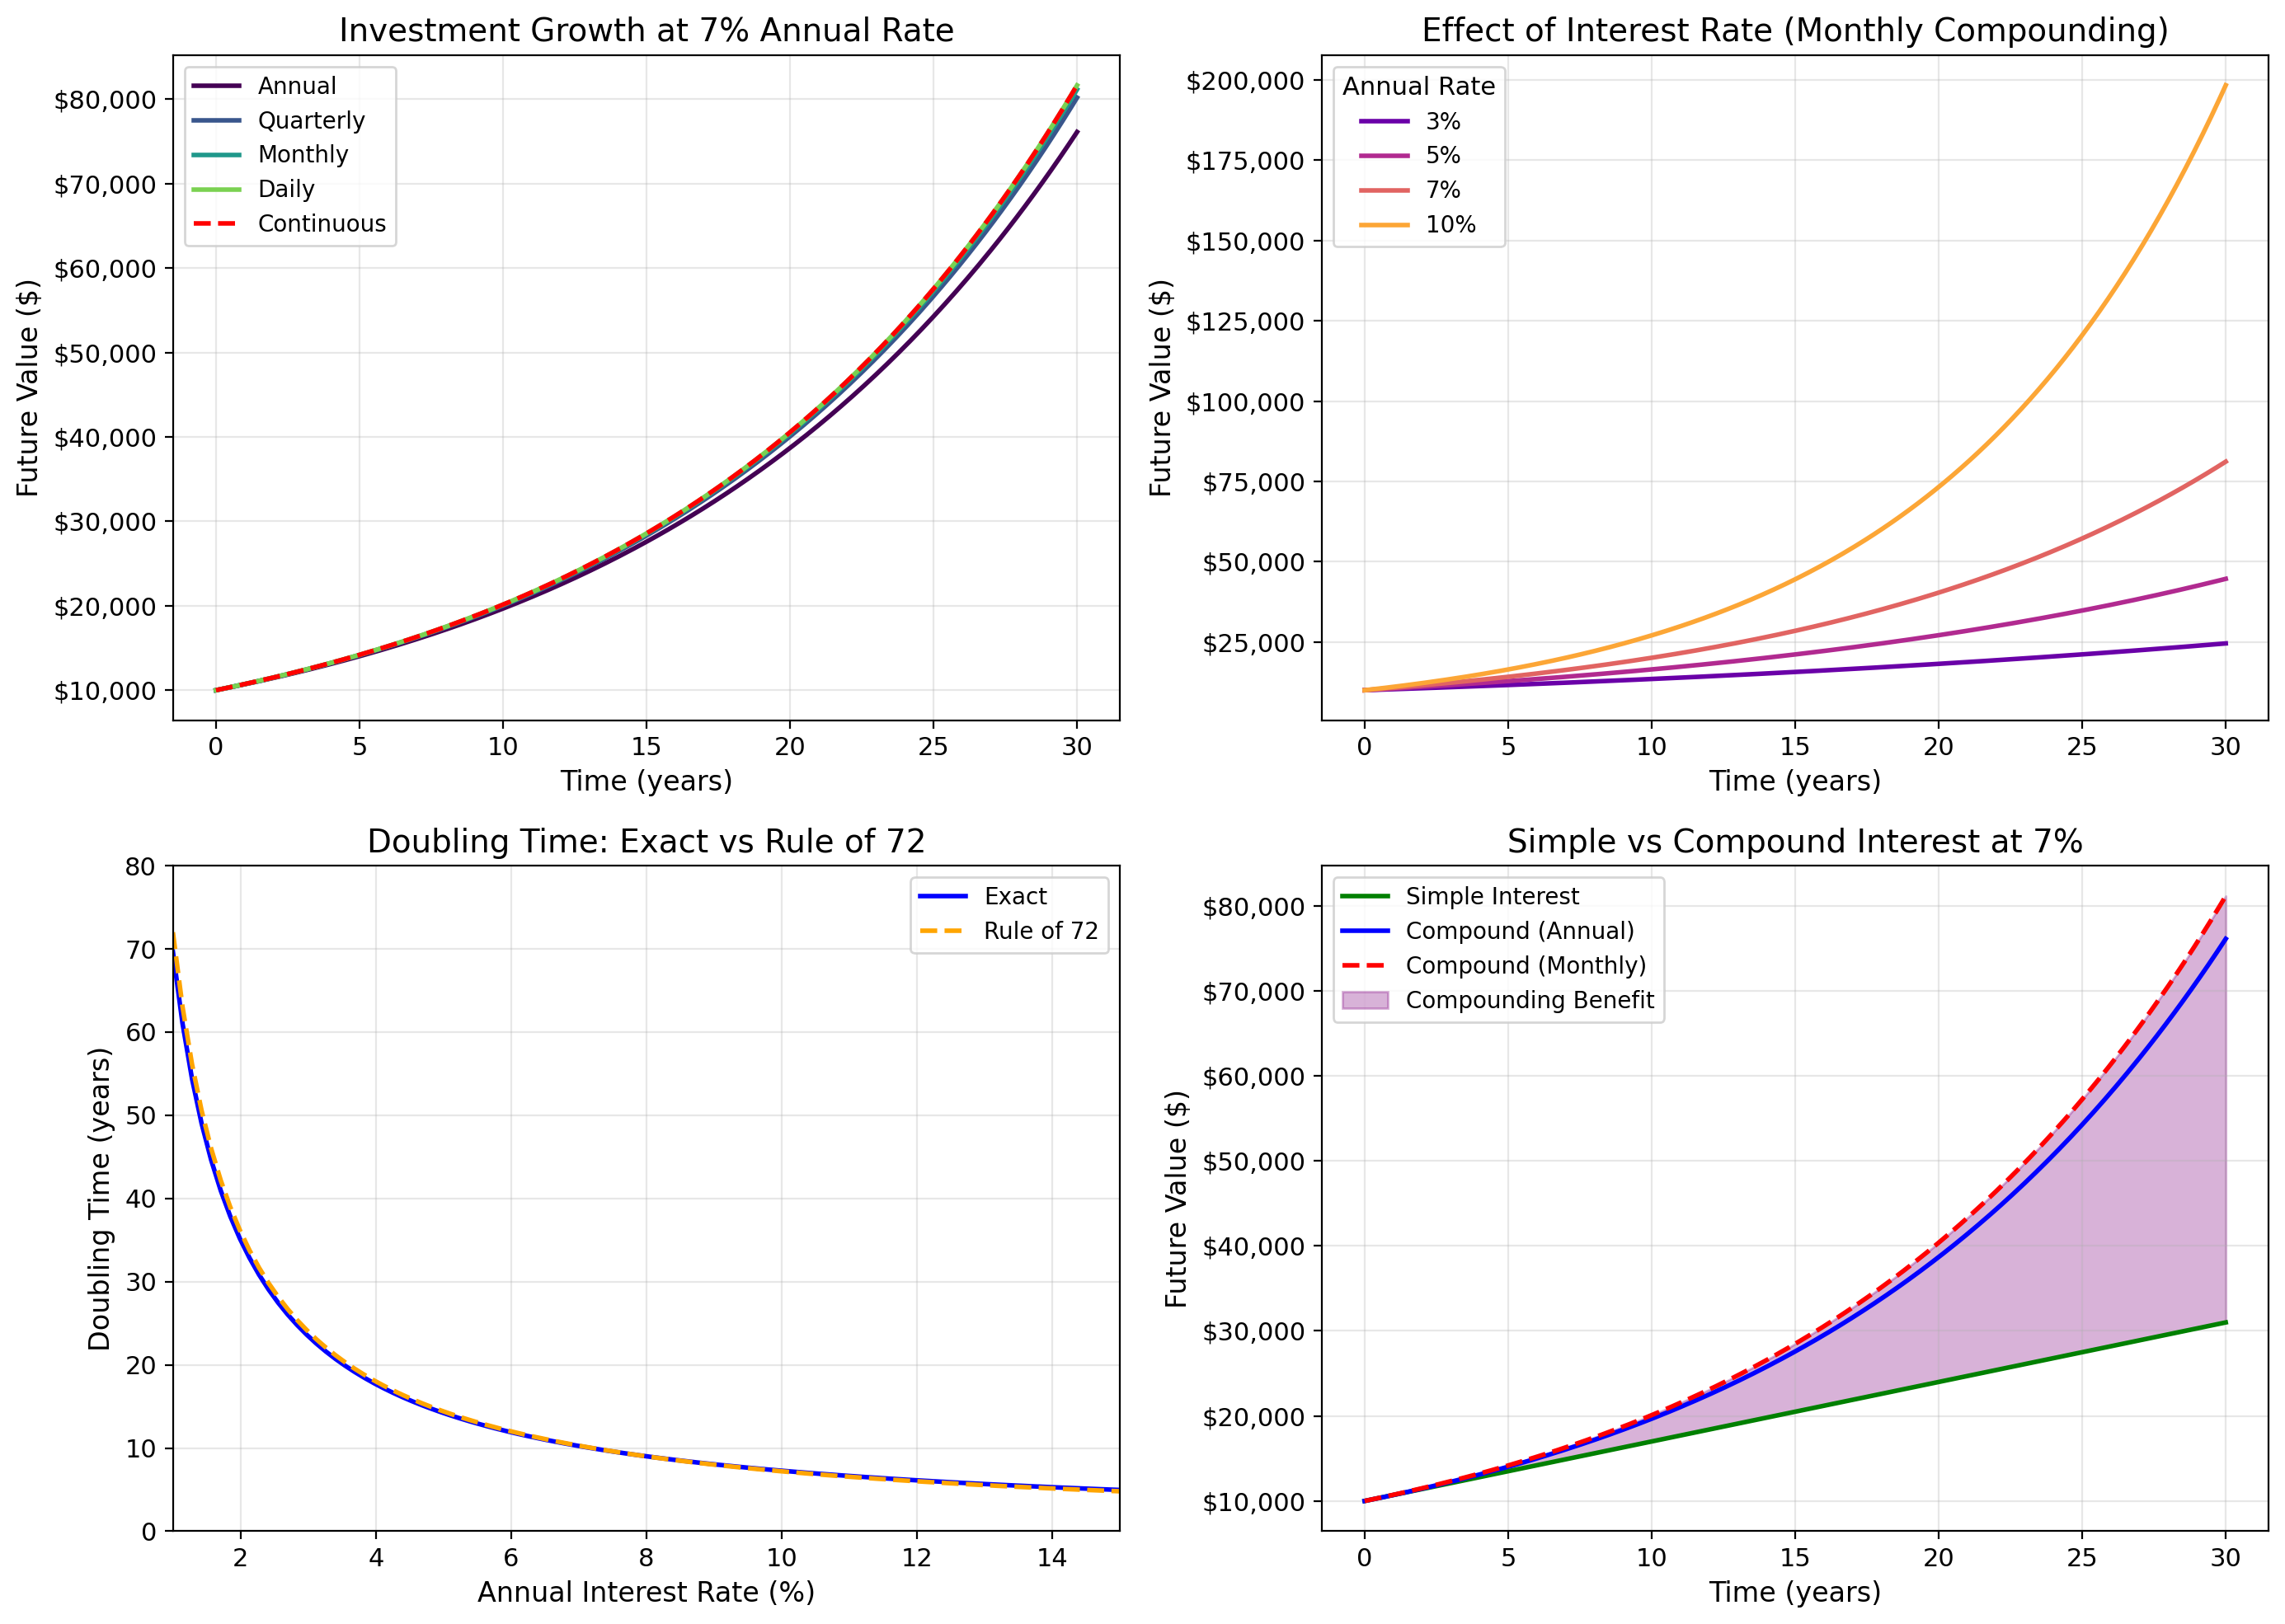


Figure saved to 'plot.png'


In [4]:
# Time array
time = np.linspace(0, 30, 300)

# Parameters
P = 10000
r = 0.07  # 7% annual rate

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Currency formatter
def currency_formatter(x, pos):
    return f'${x:,.0f}'

# Plot 1: Comparison of compounding frequencies
ax1 = axes[0, 0]
frequencies = [1, 4, 12, 365]
labels = ['Annual', 'Quarterly', 'Monthly', 'Daily']
colors = plt.cm.viridis(np.linspace(0, 0.8, len(frequencies)))

for n, label, color in zip(frequencies, labels, colors):
    fv = compound_interest(P, r, n, time)
    ax1.plot(time, fv, label=label, color=color, linewidth=2)

# Add continuous compounding
fv_cont = continuous_compound_interest(P, r, time)
ax1.plot(time, fv_cont, label='Continuous', color='red', linewidth=2, linestyle='--')

ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Future Value ($)')
ax1.set_title(f'Investment Growth at {r*100:.0f}% Annual Rate')
ax1.legend(loc='upper left')
ax1.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
ax1.grid(True, alpha=0.3)

# Plot 2: Effect of interest rate
ax2 = axes[0, 1]
rates = [0.03, 0.05, 0.07, 0.10]
colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(rates)))

for rate, color in zip(rates, colors):
    fv = compound_interest(P, rate, 12, time)
    ax2.plot(time, fv, label=f'{rate*100:.0f}%', color=color, linewidth=2)

ax2.set_xlabel('Time (years)')
ax2.set_ylabel('Future Value ($)')
ax2.set_title('Effect of Interest Rate (Monthly Compounding)')
ax2.legend(title='Annual Rate', loc='upper left')
ax2.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
ax2.grid(True, alpha=0.3)

# Plot 3: Doubling time analysis (Rule of 72)
ax3 = axes[1, 0]
rates_range = np.linspace(0.01, 0.15, 100)
doubling_time_exact = np.log(2) / np.log(1 + rates_range)
doubling_time_rule72 = 72 / (rates_range * 100)

ax3.plot(rates_range * 100, doubling_time_exact, label='Exact', linewidth=2, color='blue')
ax3.plot(rates_range * 100, doubling_time_rule72, label='Rule of 72', linewidth=2, 
         linestyle='--', color='orange')

ax3.set_xlabel('Annual Interest Rate (%)')
ax3.set_ylabel('Doubling Time (years)')
ax3.set_title('Doubling Time: Exact vs Rule of 72')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlim([1, 15])
ax3.set_ylim([0, 80])

# Plot 4: Compound vs Simple Interest
ax4 = axes[1, 1]
simple_interest = P * (1 + r * time)
compound_annual = compound_interest(P, r, 1, time)
compound_monthly = compound_interest(P, r, 12, time)

ax4.plot(time, simple_interest, label='Simple Interest', linewidth=2, color='green')
ax4.plot(time, compound_annual, label='Compound (Annual)', linewidth=2, color='blue')
ax4.plot(time, compound_monthly, label='Compound (Monthly)', linewidth=2, 
         linestyle='--', color='red')

# Fill the difference area
ax4.fill_between(time, simple_interest, compound_monthly, alpha=0.3, 
                  color='purple', label='Compounding Benefit')

ax4.set_xlabel('Time (years)')
ax4.set_ylabel('Future Value ($)')
ax4.set_title(f'Simple vs Compound Interest at {r*100:.0f}%')
ax4.legend(loc='upper left')
ax4.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('compound_interest_calculator_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## The Rule of 72

The Rule of 72 is a useful approximation for estimating the doubling time of an investment:

$$t_{\text{double}} \approx \frac{72}{r \times 100}$$

where $r$ is the annual interest rate as a decimal.

The exact doubling time is:

$$t_{\text{double}} = \frac{\ln(2)}{\ln(1 + r)}$$

The Rule of 72 works well for rates between 6% and 10%.

In [5]:
print("Rule of 72 Accuracy Analysis")
print("=" * 50)
print(f"{'Rate':>8} {'Exact':>12} {'Rule of 72':>12} {'Error':>10}")
print("-" * 50)

for rate_pct in [2, 4, 6, 8, 10, 12, 15]:
    rate = rate_pct / 100
    exact = np.log(2) / np.log(1 + rate)
    rule72 = 72 / rate_pct
    error = abs(rule72 - exact) / exact * 100
    print(f"{rate_pct:>7}% {exact:>11.2f}y {rule72:>11.2f}y {error:>9.2f}%")

Rule of 72 Accuracy Analysis
    Rate        Exact   Rule of 72      Error
--------------------------------------------------
      2%       35.00y       36.00y      2.85%
      4%       17.67y       18.00y      1.85%
      6%       11.90y       12.00y      0.88%
      8%        9.01y        9.00y      0.07%
     10%        7.27y        7.20y      1.00%
     12%        6.12y        6.00y      1.90%
     15%        4.96y        4.80y      3.22%


## Conclusion

This notebook demonstrated the mathematical foundations and practical applications of compound interest calculations. Key findings:

1. **Compounding frequency matters**: More frequent compounding yields higher returns, though with diminishing marginal benefits as $n \to \infty$.

2. **Exponential growth**: Compound interest exhibits exponential growth, making time the most powerful factor in wealth accumulation.

3. **Rule of 72**: Provides a quick and reasonably accurate estimate for doubling time at moderate interest rates.

4. **Compound vs Simple**: The difference between compound and simple interest becomes increasingly significant over longer time horizons.

These principles form the foundation for understanding mortgages, investments, loans, and many other financial instruments.